In [1]:
import os

import cv2
from pylab import *
%matplotlib inline
import numpy as np
from keras.layers import Input, concatenate, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model, Sequential
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.optimizers import Adam, SGD
from sklearn.utils import shuffle
import keras
import tensorflow as tf

Імпорт даних

In [2]:
test_path = 'dataset_1/test'
validation_path = 'dataset/validation'
train_path = 'dataset/train'

class_names = ['with', 'without']

photo_size = (700,300)

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator generates batches of tensor image data with real-time data augmentation.
# The data will be looped over (in batches).
# in this example, we won't be doing any image augmentation
# datagen = ImageDataGenerator(rescale=1.0/255.0, samplewise_center=True, samplewise_std_normalization=True,validation_split=0.99)
f = lambda x : (x-128)/255
# f = lambda x: x
train_batches = ImageDataGenerator(preprocessing_function=f).flow_from_directory(train_path,
                                                         target_size=photo_size,
                                                         batch_size=32)

valid_batches = ImageDataGenerator(preprocessing_function=f).flow_from_directory(validation_path,
                                                         target_size=photo_size,
                                                         batch_size=32)

test_batches = ImageDataGenerator(preprocessing_function=f).flow_from_directory(test_path,
                                                        target_size=photo_size,
                                                        batch_size=10,
                                                        shuffle=False)

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


Start the network

In [9]:
dropout_rate = 0.2

model = Sequential()

model.add(BatchNormalization(input_shape=(photo_size[0],photo_size[1],3)))
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Conv2D(128, (5,5), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Conv2D(512, (5,5), padding='same', activation='relu'))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(1024, (5,5), padding='same', activation='relu'))
# model.add(Conv2D(1024, (3,3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(dropout_rate))
# model.add(Dense(100, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(2,activation='softmax'))

model.summary(line_length = 100)

Model: "sequential_5"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 batch_normalization_5 (BatchNormalization)  (None, 700, 300, 3)                     12             
                                                                                                    
 conv2d_44 (Conv2D)                          (None, 700, 300, 64)                    4864           
                                                                                                    
 conv2d_45 (Conv2D)                          (None, 700, 300, 64)                    36928          
                                                                                                    
 max_pooling2d_22 (MaxPooling2D)             (None, 350, 150, 64)                    0              
                                                                     

In [9]:
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
#               metrics=['accuracy'])

In [ ]:
from tensorflow import keras

# training
# batch_size = 64
epochs=15

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.125epochs.hdf5', verbose=1, save_best_only=True)

optimizer = keras.optimizers.Adam(lr=0.0005, decay=1e-5)
# mse > crossentropy
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit_generator(train_batches, callbacks=[checkpointer], epochs=epochs, verbose=2, validation_data=(valid_batches))

/home/maximus/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/tmp/ipykernel_4789/3415573829.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batches, callbacks=[checkpointer], epochs=epochs, verbose=2, validation_data=(valid_batches))


Epoch 1/15

Epoch 1: val_loss improved from inf to 1.21213, saving model to model.125epochs.hdf5
2/2 - 104s - loss: 0.6900 - accuracy: 0.5500 - val_loss: 1.2121 - val_accuracy: 0.5000 - 104s/epoch - 52s/step
Epoch 2/15

Epoch 2: val_loss improved from 1.21213 to 0.69370, saving model to model.125epochs.hdf5
2/2 - 95s - loss: 6.3293 - accuracy: 0.5667 - val_loss: 0.6937 - val_accuracy: 0.5000 - 95s/epoch - 48s/step
Epoch 3/15

Epoch 3: val_loss improved from 0.69370 to 0.69308, saving model to model.125epochs.hdf5
2/2 - 78s - loss: 0.7161 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - 78s/epoch - 39s/step
Epoch 4/15

Epoch 4: val_loss did not improve from 0.69308
2/2 - 82s - loss: 0.6898 - accuracy: 0.5333 - val_loss: 0.6931 - val_accuracy: 0.5000 - 82s/epoch - 41s/step
Epoch 5/15

Epoch 5: val_loss improved from 0.69308 to 0.69305, saving model to model.125epochs.hdf5
2/2 - 80s - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - 80s/epoch - 40s

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.125epochs.hdf5')

In [16]:
# evaluate test accuracy
score = model.evaluate(x_test,y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 43.8596%


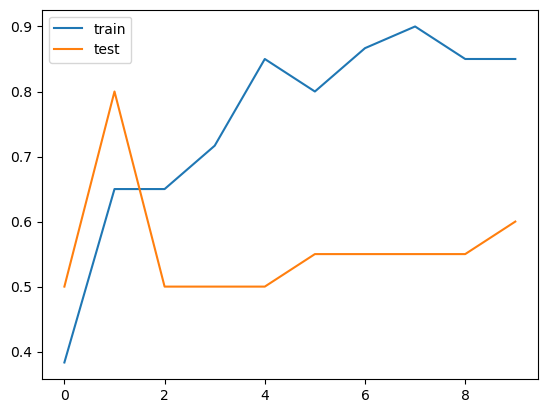

In [17]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()